In [1]:
import numpy as np
import matplotlib.pyplot as plt

画散点图

In [3]:
y = np.random.standard_normal((1000, 2))

Text(0.5, 1.0, 'Scatter Plot')

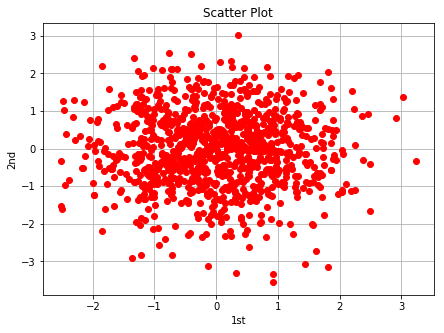

In [2]:
plt.figure(figsize = (7, 5))
plt.plot(y[:,0], y[:,1], 'ro')
plt.grid(True)
plt.xlabel('1st')
plt.ylabel('2nd')
plt.title('Scatter Plot')

Text(0.5, 1.0, 'Scatter Plot')

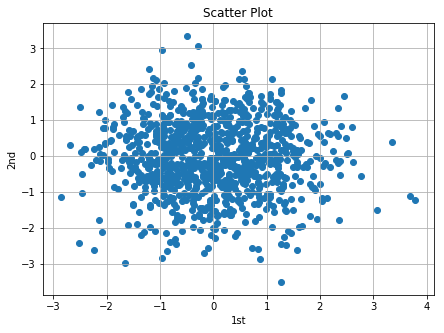

In [4]:
plt.figure(figsize = (7, 5))
plt.scatter(y[:,0], y[:,1], marker='o')
plt.grid(True)
plt.xlabel('1st')
plt.ylabel('2nd')
plt.title('Scatter Plot')

画彩色图形

In [5]:
c = np.random.randint(0, 10, len(y))

Text(0.5, 1.0, 'Scatter Plot')

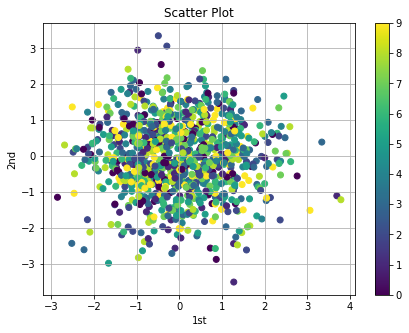

In [6]:
plt.figure(figsize = (7, 5))
plt.scatter(y[:,0], y[:,1], c=c, marker='o')
plt.colorbar()
plt.grid(True)
plt.xlabel('1st')
plt.ylabel('2nd')
plt.title('Scatter Plot')

画直方图

Text(0.5, 1.0, 'Histogram')

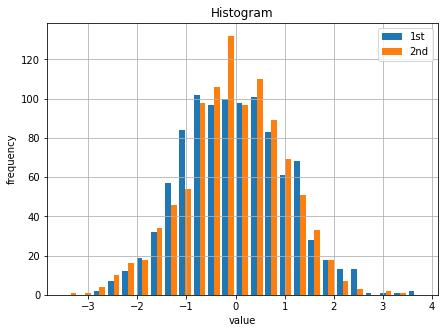

In [7]:
plt.figure(figsize = (7, 5))
plt.hist(y, label=['1st', '2nd'], bins=25)
#plt.hist(y, label=['1st', '2nd'], color=['b', 'g'],starked=True,bins=25)
plt.grid(True)
plt.legend(loc=0)
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('Histogram')

箱状图

Text(0.5, 1.0, 'Boxplot')

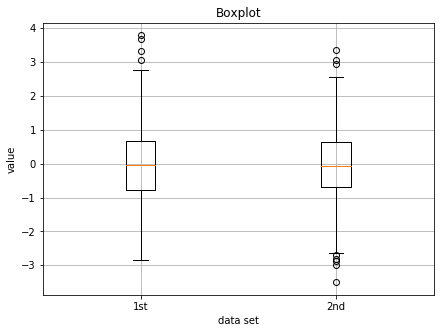

In [8]:
fig, ax = plt.subplots(figsize = (7, 5))
plt.boxplot(y)
plt.grid(True)
plt.setp(ax, xticklabels=['1st', '2nd'])
plt.xlabel('data set')
plt.ylabel('value')
plt.title('Boxplot')

多边形，以及注释

In [9]:
from matplotlib.patches import Polygon

In [10]:
def func(x):
    return 0.5 * np.exp(x) + 1

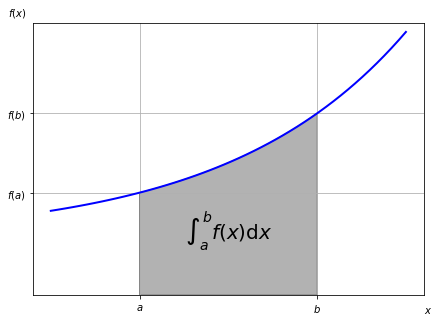

In [13]:
a, b = 0.5, 1.5
x = np.linspace(0, 2)
y = func(x)

fig, ax = plt.subplots(figsize=(7, 5))
plt.plot(x, y, 'b', linewidth=2)
plt.ylim(bottom=0)

Ix = np.linspace(a, b)
Iy = func(Ix)
verts = [(a, 0)] + list(zip(Ix, Iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.7', edgecolor='0.5')
ax.add_patch(poly)

plt.text(0.5 * (a + b), 1, r"$\int_a^b f(x)\mathrm{d}x$", horizontalalignment='center', fontsize=20)

plt.figtext(0.9, 0.075, '$x$')
plt.figtext(0.075, 0.9, '$f(x)$')

ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([func(a), func(b)])
ax.set_yticklabels(('$f(a)$', '$f(b)$'))
plt.grid(True)

金融学图表

In [18]:
import pandas_datareader.data as web
import datetime

In [19]:
start = datetime.datetime(2017, 5, 1)
end = datetime.datetime(2017, 6, 30)
df = web.DataReader("^GDAXI", 'yahoo', start, end)

In [20]:
df[:2]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-05-02,12511.169922,12433.509766,12478.459961,12507.900391,85263200.0,12507.900391
2017-05-03,12532.250000,12477.870117,12502.360352,12527.839844,79318800.0,12527.839844


3D绘图

In [22]:
strike = np.linspace(50, 150, 24)
ttm = np.linspace(0.5, 2.5, 24)
strike, ttm = np.meshgrid(strike, ttm)
iv = (strike - 100) ** 2 / (100 * strike) / ttm

In [24]:
from mpl_toolkits.mplot3d import Axes3D

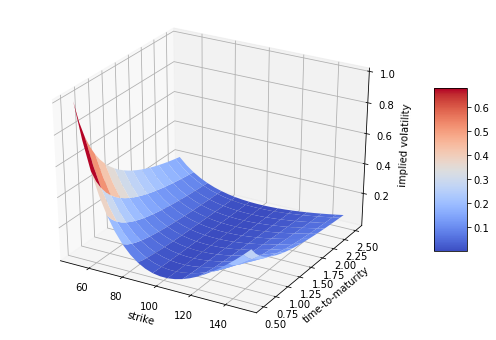

In [25]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(strike, ttm, iv, rstride=2, cstride=2,
                      cmap=plt.cm.coolwarm, linewidth=0.5,
                      antialiased=True)

ax.set_xlabel('strike')
ax.set_ylabel('time-to-maturity')
ax.set_zlabel('implied volatility')

fig.colorbar(surf, shrink=0.5, aspect=5)